In [1]:
import os

from jina.flow import Flow
from jina.logging import default_logger as logger
from jina.proto import jina_pb2
from jina.proto import uid

from PIL import Image
import matplotlib.pyplot as plt
# plt.rcParams["axes.grid"] = False
# plt.axis('off')

In [2]:
os.environ['PARALLEL'] = '1'
os.environ['SHARDS'] = '1'
os.environ['WORKDIR'] = './workspace'
os.makedirs(os.environ['WORKDIR'], exist_ok=True)
os.environ['JINA_PORT'] = '45678'

In [3]:
def print_result(resp):
    import io
    from base64 import b64decode
    from PIL import Image
    for i in range(10):
        image_data_uri = resp.search.docs[0].matches[i].uri
        header, encoded = image_data_uri.split(",", 1)
        image_data = b64decode(encoded)
        image = Image.open(io.BytesIO(image_data))
        logger.info(image)

def query_generator(image_paths, text_queries):
    for image_path, text in zip(image_paths, text_queries):
        doc = jina_pb2.Document()
        chunk1 = doc.chunks.add()
        chunk2 = doc.chunks.add()
        chunk1.modality = 'image'
        chunk2.modality = 'text'
        chunk1.id = uid.new_doc_id(chunk1)
        chunk2.id = uid.new_doc_id(chunk2)
        with open(image_path, 'rb') as fp:
            chunk1.buffer = fp.read()
        chunk2.text = text
        yield doc

In [4]:
image_paths = '../../data/women-fashion200k/dresses/casual_and_day_dresses/58648388/58648388_2.jpeg'
text_queries = 'change color to black'

# f = Flow.load_config('flow-query.yml')
# with f:
#     f.search(query_generator(image_paths, text_queries), output_fn=print_result, batch_size=1)

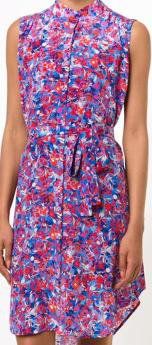

In [5]:
img = Image.open(open(image_paths, 'rb'))
img

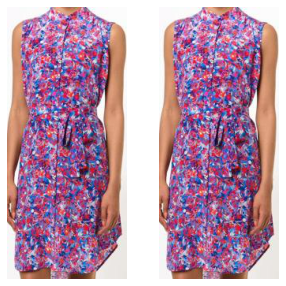

In [7]:
n_row = 1
n_col = 2
_, axs = plt.subplots(n_row, n_col, figsize=(5, 5))
axs = axs.flatten()
for img, ax in zip([img, img], axs):
    ax.axis('off')
    ax.imshow(img)